
# Delete stations from metadata

This script is used to cleanup stations, which we do not want to include furthermore.  

Reasons:
- No location (`NaN`)


In [10]:
import pyproj
import matplotlib.pyplot as plt

from camelsp import get_metadata, Station


In [2]:
# Get metadata
metadata = get_metadata()
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years,q_w_pearson,q_w_spearman
0,DEE10000,440003,./DEE/DEE10000/DEE10000_data.csv,DEE,Sachsen-Anhalt,Ummendorf,Aller,124.900,52.300,4.402365e+06,3.227863e+06,11.188884,52.154576,10684.0,10684.0,29.268493,9.389041,0.537862,0.581002
1,DEE10010,440004,./DEE/DEE10010/DEE10010_data.csv,DEE,Sachsen-Anhalt,Alleringersleben,Aller,113.240,142.000,4.398520e+06,3.234256e+06,11.134176,52.212572,28879.0,28879.0,51.361644,79.117808,0.861575,0.851983
2,DEE10020,440008,./DEE/DEE10020/DEE10020_data.csv,DEE,Sachsen-Anhalt,Walbeck,Aller,94.340,201.000,4.393928e+06,3.241476e+06,11.068552,52.278070,18355.0,18355.0,48.282192,50.284932,0.941525,0.895263
3,DEE10030,440010,./DEE/DEE10030/DEE10030_data.csv,DEE,Sachsen-Anhalt,Weferlingen,Aller,84.320,238.000,4.393036e+06,3.245503e+06,11.056336,52.314377,28951.0,28951.0,51.284932,79.315068,0.825320,0.812189
4,DEE10040,441201,./DEE/DEE10040/DEE10040_data.csv,DEE,Sachsen-Anhalt,Hödingen,Schölecke,93.970,23.000,4.396340e+06,3.243827e+06,11.104414,52.298873,15067.0,15067.0,29.268493,41.276712,0.727779,0.819505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178,0.535678,0.634351
3006,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726,0.931055,0.994364
3007,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438,0.997335,0.999000
3008,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055,0.976192,0.987846


### Delete stations where we have no location

In [3]:
# filter metadata where lon or lar is nan
print(f"Number of stations whithout location in metadata: {len(metadata[(metadata['lon'].isna() | metadata['lat'].isna())])}")

metadata = metadata[~(metadata['lon'].isna() | metadata['lat'].isna())]
metadata

Number of stations whithout location in metadata: 263


,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years,q_w_pearson,q_w_spearman
0,DEE10000,440003,./DEE/DEE10000/DEE10000_data.csv,DEE,Sachsen-Anhalt,Ummendorf,Aller,124.900,52.300,4.402365e+06,3.227863e+06,11.188884,52.154576,10684.0,10684.0,29.268493,9.389041,0.537862,0.581002
1,DEE10010,440004,./DEE/DEE10010/DEE10010_data.csv,DEE,Sachsen-Anhalt,Alleringersleben,Aller,113.240,142.000,4.398520e+06,3.234256e+06,11.134176,52.212572,28879.0,28879.0,51.361644,79.117808,0.861575,0.851983
2,DEE10020,440008,./DEE/DEE10020/DEE10020_data.csv,DEE,Sachsen-Anhalt,Walbeck,Aller,94.340,201.000,4.393928e+06,3.241476e+06,11.068552,52.278070,18355.0,18355.0,48.282192,50.284932,0.941525,0.895263
3,DEE10030,440010,./DEE/DEE10030/DEE10030_data.csv,DEE,Sachsen-Anhalt,Weferlingen,Aller,84.320,238.000,4.393036e+06,3.245503e+06,11.056336,52.314377,28951.0,28951.0,51.284932,79.315068,0.825320,0.812189
4,DEE10040,441201,./DEE/DEE10040/DEE10040_data.csv,DEE,Sachsen-Anhalt,Hödingen,Schölecke,93.970,23.000,4.396340e+06,3.243827e+06,11.104414,52.298873,15067.0,15067.0,29.268493,41.276712,0.727779,0.819505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178,0.535678,0.634351
3006,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726,0.931055,0.994364
3007,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438,0.997335,0.999000
3008,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055,0.976192,0.987846


### Plot all stations to see if any stations are "off" / outside of Germany

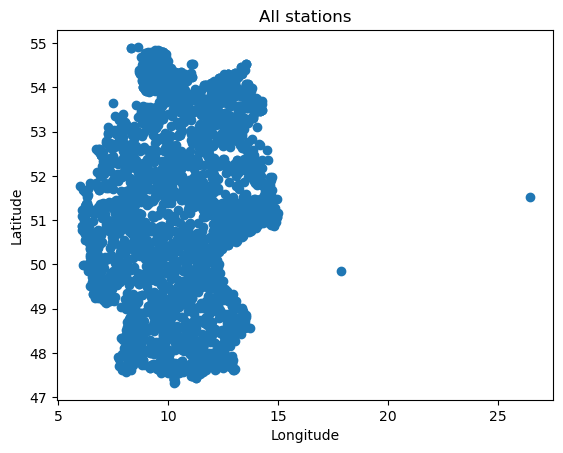

In [4]:
plt.scatter(metadata['lon'], metadata['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All stations')
plt.show()


In [5]:
# get the two station with maximum longitude
metadata[metadata['lon'] >= metadata['lon'].sort_values(ascending=False).iloc[1]]



,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years,q_w_pearson,q_w_spearman
1070,DEB10440,2718085500,./DEB/DEB10440/DEB10440_data.csv,DEB,Rheinland-Pfalz,Niederadenau,Adenauer Bach,221.982,57.03,4.886412e+06,3.000456e+06,17.877068,49.843313,2919.0,2919.0,8.005479,8.005479,0.882173,0.988777
1875,DE812120,59607.3,./DE8/DE812120/DE812120_data.csv,DE8,Mecklenburg Vorpommern,Plau,Gerinne,60.060,1230.00,5.453414e+06,3.284893e+06,26.475180,51.516893,4017.0,4017.0,10.002740,9.002740,0.958627,0.979679


Two stations are located outside of Germany, which is obviously an error.  

Correct that error by hand!


Starting with station `DEB10440` in Rheinland-Pfalz, I found the location on this [website](https://www.aw-wiki.de/index.php/Pegel_Adenauer_Bach_(Niederadenau)), when right-clicking on the icon the displayed map.  
- lon: 6.93165
- lat: 50.435469

I just overwrite X, Y, lon and lat in the metadata with this values.

In [6]:
# Define the source and target coordinate systems
source_crs = "EPSG:4326"  # WGS84
target_crs = "EPSG:31466"  # DHDN / 3-degree Gauss-Kruger zone 2

# Create a transformer object
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Define the original coordinates
lon = 6.93165
lat = 50.435469

# Convert the coordinates
x, y = transformer.transform(lon, lat)

print(f"Converted coordinates: {x}, {y}")

Converted coordinates: 2566233.4287766777, 5589261.994987712


In [7]:
# overwrite the lon and lat where camels_id==DEB10440 with the transformed coordinates
metadata.loc[metadata['camels_id'] == 'DEB10440', ['lon', 'lat']] = lon, lat
metadata.loc[metadata['camels_id'] == 'DEB10440', ['x', 'y']] = x, y

metadata[metadata['camels_id'] == 'DEB10440']

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years,q_w_pearson,q_w_spearman
1070,DEB10440,2718085500,./DEB/DEB10440/DEB10440_data.csv,DEB,Rheinland-Pfalz,Niederadenau,Adenauer Bach,221.982,57.03,2.566233e+06,5.589262e+06,6.93165,50.435469,2919.0,2919.0,8.005479,8.005479,0.882173,0.988777


Now we go for `DE812120` (Pegel Plau). For this particular gauge, I cannot find a definitive location. There are some Pegel Plau in the metadata.  
The one with the wrong location is with Gewässer 'Gerinne', which sounds not that important.  
Data coverage is also only 9 years with some weird jumps.  

--> Decided to delete this Pegel entirely, as it is not clear what to do with it.

In [8]:
# delete station from metadata
metadata = metadata[metadata['camels_id'] != 'DE812120']
metadata

,camels_id,provider_id,camels_path,nuts_lvl2,federal_state,gauge_name,waterbody_name,gauge_elevation,area,x,y,lon,lat,q_count,w_count,q_extent_years,w_extent_years,q_w_pearson,q_w_spearman
0,DEE10000,440003,./DEE/DEE10000/DEE10000_data.csv,DEE,Sachsen-Anhalt,Ummendorf,Aller,124.900,52.300,4.402365e+06,3.227863e+06,11.188884,52.154576,10684.0,10684.0,29.268493,9.389041,0.537862,0.581002
1,DEE10010,440004,./DEE/DEE10010/DEE10010_data.csv,DEE,Sachsen-Anhalt,Alleringersleben,Aller,113.240,142.000,4.398520e+06,3.234256e+06,11.134176,52.212572,28879.0,28879.0,51.361644,79.117808,0.861575,0.851983
2,DEE10020,440008,./DEE/DEE10020/DEE10020_data.csv,DEE,Sachsen-Anhalt,Walbeck,Aller,94.340,201.000,4.393928e+06,3.241476e+06,11.068552,52.278070,18355.0,18355.0,48.282192,50.284932,0.941525,0.895263
3,DEE10030,440010,./DEE/DEE10030/DEE10030_data.csv,DEE,Sachsen-Anhalt,Weferlingen,Aller,84.320,238.000,4.393036e+06,3.245503e+06,11.056336,52.314377,28951.0,28951.0,51.284932,79.315068,0.825320,0.812189
4,DEE10040,441201,./DEE/DEE10040/DEE10040_data.csv,DEE,Sachsen-Anhalt,Hödingen,Schölecke,93.970,23.000,4.396340e+06,3.243827e+06,11.104414,52.298873,15067.0,15067.0,29.268493,41.276712,0.727779,0.819505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,DE112470,76273,./DE1/DE112470/DE112470_data.csv,DE1,Baden-Württemberg,Blaubeuren,Blautopf,511.871,0.067,4.304981e+06,2.811435e+06,9.783683,48.416174,30987.0,30987.0,65.380822,79.219178,0.535678,0.634351
3006,DE112480,76274,./DE1/DE112480/DE112480_data.csv,DE1,Baden-Württemberg,Erlenbach,Sulm,160.832,101.510,4.267341e+06,2.895499e+06,9.264333,49.170156,4140.0,4140.0,11.339726,11.339726,0.931055,0.994364
3007,DE112490,76276,./DE1/DE112490/DE112490_data.csv,DE1,Baden-Württemberg,Bolheim,Brenz,473.000,339.811,4.332390e+06,2.835208e+06,10.154468,48.630150,5555.0,5555.0,15.175342,15.216438,0.997335,0.999000
3008,DE112500,76290,./DE1/DE112500/DE112500_data.csv,DE1,Baden-Württemberg,Schweinhausen,Riß,541.098,101.589,4.305130e+06,2.769259e+06,9.787300,48.036705,8342.0,8342.0,22.852055,22.852055,0.976192,0.987846


## Add any further cleanup here

- negative values in q and w -> what do we do?

In [9]:
meta = get_metadata()
camels_ids = meta['camels_id'].to_list()

ids_with_negative_values = []

for camels_id in camels_ids:
    neg = False

    s = Station(camels_id)
    
    df = s.get_data()
    
    # check if there are numbers < 0 in q and w columns, ignore nan
    if 'q' in df.columns:
        if (df['q'] < -0).any():
            neg = True
    if 'w' in df.columns:
        if (df['w'] < -0).any():
            neg = True
    if neg:
        ids_with_negative_values.append(camels_id)

print(f"Number of stations with negative values: {len(ids_with_negative_values)}")

Number of stations with negative values: 122


There are 114 stations with negative values.  
As negative values can be explainable, we do not simply delete all of these stations.  
I have to check all of this stations manually to see if the data looks okay...

In [11]:
# import plotly.graph_objects as go

# delete_ids = []

# for camels_id in ids_with_negative_values:
#     s = Station(camels_id)

#     df = s.get_data()
    
#     neg_q = False
#     neg_w = False

#     fig = go.Figure()

#     # check if there are numbers < 0 in q and w columns, ignore nan
#     if 'q' in df.columns:
#         if (df['q'] < -0).any():
#             neg_q = True
            
#             # plot q
#             fig.add_trace(go.Scatter(x=df.index, y=df['q'], mode='lines'))
#             fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()}")
#     if 'w' in df.columns:
#         if (df['w'] < -0).any():
#             neg_w = True
#             # plot w
#             fig.add_trace(go.Scatter(x=df.index, y=df['w'], mode='lines'))
#             fig.update_layout(title=f"{s.name} --- min w: {df['w'].min()}")

#     if neg_q and neg_w:
#         fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()} --- min w: {df['w'].min()}")

#     fig.show()

#     # user input to delete station
#     delete = input("Delete station? (y/n)")
#     if delete == 'y':
#         delete_ids.append(camels_id)
        
#         # update title
#         fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()} --- min w: {df['w'].min()} --- DO delete")
    
#     elif delete == 'n':
#         # clear plot
#         fig.update_layout(title=f"{s.name} --- min q: {df['q'].min()} --- min w: {df['w'].min()} --- DO NOT delete")
    
#     elif delete == 'stop':
#         break
    
#     from IPython.display import clear_output
#     clear_output(wait=True)
#     continue


## Save new metadata

In [12]:
# save metadata
metadata = metadata.reset_index(drop=True)
metadata.to_csv('../output_data/metadata/metadata.csv', index=False)

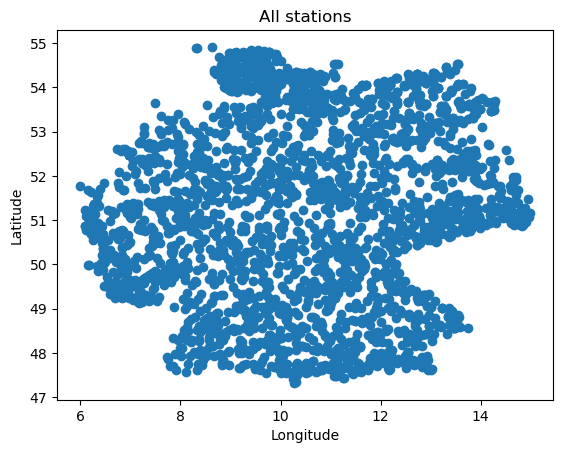

In [13]:
metadata = get_metadata()

plt.scatter(metadata['lon'], metadata['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All stations')
plt.show()
